# **Logistic Regression**
Logistic regression is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not. Logistic regression is a statistical algorithm which analyze the relationship between two data factors. The article explores the fundamentals of logistic regression, it’s types and implementations.

Logistic regression is used for binary classification where we use sigmoid function, that takes input as independent variables and produces a probability value between 0 and 1.

For example, we have two classes Class 0 and Class 1 if the value of the logistic function for an input is greater than 0.5 (threshold value) then it belongs to Class 1 otherwise it belongs to Class 0. It’s referred to as regression because it is the extension of linear regression but is mainly used for classification problems.

![Sigmoid function](https://media.licdn.com/dms/image/v2/D4D12AQGIXdSG7IJCNw/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1694183259537?e=2147483647&v=beta&t=lJ_qEzot0iGYhNpez9XGRNHjS-CDKHn3Wj-6iCQxRO0)

## Why Linear regression can't be used to classify

**1. Output Range Mismatch**\
Linear regression predicts any real number (\(-\infty \) to \(+\infty \)), while classification needs probabilities (0 to 1) or distinct classes. A regression line might predict values like 1.5 or -0.2, which aren't valid probabilities.

**2. Sensitivity to Outliers**\
Outliers heavily skew the regression line, distorting the predicted class boundary, whereas classification models need to be robust to such data points.

## Sigmoid function
A sigmoid function is a mathematical function that creates a characteristic "S"-shaped curve, mapping any input value to an output between 0 and 1, making it ideal for representing probabilities in machine learning, especially for binary classification in logistic regression

$$ σ(z)=\frac{1}{1+e^{-z}} $$
$$ here\ z = θ₀ + θ₁x $$
$$ θ₀ = intercept,\ θ₁ = slope $$


## Log Loss function
In **logistic regression**, we don't use MSE or MAE as they don't form a convence function, and the model can get stucked in local minimas. So have to use a ***Log loss function***.

The log loss function, also known as binary cross-entropy loss, is the standard evaluation metric and cost function for binary classification models that output probabilities, such as Logistic Regression.

$$ C(θ₁, θ₂) = \sum^{n}_{i=1} (y\log (ŷ)-(1-y)\log (1-ŷ)) $$
$$ n = number\ of\ data\ points $$
$$ ŷ = predicted\ points\ y = actual\ points $$

This function will create a proper convex function, or *gradient descent* for our convergence algorithm

## Convergence Algorithm
A convergence algorithm in machine learning is a process that adjusts a model's parameters to improve its predictions over time. This process is also known as optimization. 

$$ θj := θj - α\frac{∂}{∂θj}C(θ₁, θ₂) $$
$$ The\ breakdown: $$
$$ \frac{∂}{∂θj}J(θ₁, θ₂) => it\ is\ nothing\ but\ the\ slope\ of\ the\ line\ at\ the\ point\ θj $$
$$ ... $$
$ if\ the\ value\ of\ \frac{∂}{∂θj}C(θ₁, θ₂)\ is\ +ve\ then\ it\ is\ a\ positive\ slope\ and\ we\ have\ to\ reduce\ the\ value\ of\ θj. $
$ if\ the\ value\ of\ \frac{∂}{∂θj}C(θ₁, θ₂)\ is\ {-ve}\ then\ it\ is\ a\ positive\ slope\ and\ we\ have\ to\ increase\ the\ value\ of\ θj.\ The\ '-'\ sign\ will\ get\ cancelled\ by\ -ve\ and\ ultimately\ the\ value\ of\ θj\ will\ increase. $
$$ ... $$
$ α\ is\ knows\ as\ Learning\ rate.\ It\ is\ the\ rate\ by\ the\ value\ is\ changing $
$ The\ ideal\ value\ of\ α\ is\ 0.001  $

#### We initialise the *θj* with some starting value and it goes iteratively until we have reached the global minima. 

## Confusion Matrix (performance metrics)

A **confusion matrix** is a table that summarizes the performance of a classification model by comparing **actual labels** with **predicted labels**.

It helps us understand:
- what the model got right
- what type of mistakes it is making

For binary classification, it is a **2×2 matrix**.

### Confusion Matrix (2×2)
*note: assume a binary classifier*

![Confusion matrix](https://glassboxmedicine.com/wp-content/uploads/2019/02/confusion-matrix.png?w=1024)


### Labels in 2×2 Confusion Matrix

- **True Positive (TP)**  
  Model predicts *Positive* and the actual label is *Positive*  
  → Correct detection of a positive case

- **True Negative (TN)**  
  Model predicts *Negative* and the actual label is *Negative*  
  → Correct rejection of a negative case

- **False Positive (FP)**  
  Model predicts *Positive* but the actual label is *Negative*  
  → False alarm (Type-I error)

- **False Negative (FN)**  
  Model predicts *Negative* but the actual label is *Positive*  
  → Missed detection (Type-II error)


### Accuracy

Accuracy measures **overall correctness** of the model.

**Formula:**

$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $

It answers: Out of all predictions, how many were correct?

### Downside of Accuracy (Imbalanced Dataset)

Accuracy can be **misleading** when classes are imbalanced.

### Example:
- Dataset: 1000 samples
- Positive cases: 10
- Negative cases: 990

A dumb model predicts **Negative for all inputs**.

- TP = 0  
- TN = 990  
- FN = 10  
- FP = 0  

Accuracy: $ \frac{990}{1000} = 99\% $

But:
- Model detects **zero positive cases**
- Completely useless in practice

**Conclusion:**  
High accuracy ≠ Good model (especially in imbalanced datasets).

### Precision

Precision measures **how reliable positive predictions are**.

**Formula:**

Precision = $ \frac{TP}{TP + FP} $

It answers: When the model predicts Positive, how often is it correct?

#### **Precision Example (Spam Email)**

- Task: Detect spam emails
- False Positive = Important email marked as spam

If precision is low:
- User may miss important emails
- Trust in the system drops

**Why precision matters here:**
- We want **fewer false alarms**
- Better to let some spam pass than block real emails

`High precision = clean inbox`

### Recall

Recall measures **how many actual positives were captured**.

**Formula:**

Recall = $ \frac{TP}{TP + FN} $

It answers: Out of all real positive cases, how many did the model detect?


#### **Recall Example (Medical Diagnosis)**

- Task: Detect cancer
- False Negative = Patient has cancer but model says “healthy”

If recall is low:
- Disease goes untreated
- Life-threatening risk

**Why recall matters here:**
- Missing a positive case is dangerous
- Some false alarms are acceptable

`High recall = safer diagnosis`


### Precision vs Recall (Intuition)

- Precision cares about **prediction purity**
- Recall cares about **coverage of positives**

Increasing one often decreases the other.

### F-Beta Score

F-Beta score is a **weighted harmonic mean** of Precision and Recall.

**Formula:**

$ F_\beta = (1 + \beta^2)\cdot \frac{Precision \cdot Recall}{(\beta^2 \cdot Precision) + Recall} $

#### **Meaning of β:**
- **β = 1** → Precision and Recall equally important (F1 score)
- **β > 1** → Recall is more important
- **β < 1** → Precision is more important

#### When to use F-Beta

- When **accuracy is misleading**
- When trade-off between precision and recall matters
- When business or domain defines error cost

**Examples:**
- Medical diagnosis → β > 1
- Spam filtering → β < 1


## Implementation of logistic regression (binary classifier)

In [117]:
import pandas as pd
%matplotlib inline

In [118]:
# make a dataset
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_classes=2, n_features=10, random_state=42)

In [119]:
# see the data
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,0.964799,-0.066449,0.986768,-0.358079,0.997266,1.181890,-1.615679,-1.210161,-0.628077,1.227274
1,-0.916511,-0.566395,-1.008614,0.831617,-1.176962,1.820544,1.752375,-0.984534,0.363896,0.209470
2,-0.109484,-0.432774,-0.457649,0.793818,-0.268646,-1.836360,1.239086,-0.246383,-1.058145,-0.297376
3,1.750412,2.023606,1.688159,0.006800,-1.607661,0.184741,-2.619427,-0.357445,-1.473127,-0.190039
4,-0.224726,-0.711303,-0.220778,0.117124,1.536061,0.597538,0.348645,-0.939156,0.175915,0.236224
...,...,...,...,...,...,...,...,...,...,...
995,-1.367638,1.462255,-1.154918,-0.290454,-0.413424,0.032396,1.545490,1.428760,1.687092,1.072542
996,-1.514876,-3.221016,-1.300744,0.395599,-0.527994,1.353069,1.777506,-1.680870,1.798510,0.034272
997,1.674633,1.754933,1.586154,0.018402,-1.514470,0.321593,-2.417694,0.692723,-1.503850,0.225264
998,-0.778609,-0.835689,-0.194842,1.097220,0.180071,-0.272933,-0.533188,-0.497354,2.472138,0.867187


In [120]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25, random_state=42)

<Axes: xlabel='0', ylabel='1'>

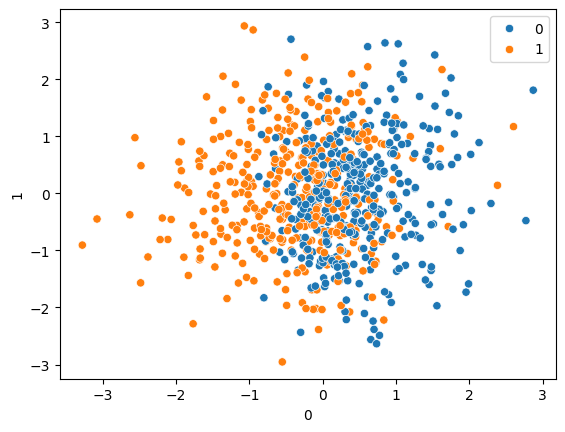

In [121]:
# visualise the data points

import seaborn as sns
sns.scatterplot(x=pd.DataFrame(X_test)[0], y=pd.DataFrame(X_test)[1], hue=y_test)

In [122]:
# train the model on train dataset
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

logistic.fit(X_train, y_train)

LogisticRegression()

In [123]:
# predict for test data
y_pred = logistic.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,

In [124]:
# perfomance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

acc = accuracy_score(y_true=y_test, y_pred=y_pred)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(acc)
report = classification_report(y_true=y_test, y_pred=y_pred)
print(cm)
print(report)

0.8586666666666667
[[320  55]
 [ 51 324]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       375
           1       0.85      0.86      0.86       375

    accuracy                           0.86       750
   macro avg       0.86      0.86      0.86       750
weighted avg       0.86      0.86      0.86       750



In [125]:
# let's check overfitting condtion
y_pred_test = logistic.predict(X_train)

print(accuracy_score(y_true=y_train, y_pred=y_pred_test))
accuracy_score(y_true=y_test, y_pred=y_pred)

0.884


0.8586666666666667